# GDP per continent

### Project It Coding Module II

In the following project, I will retrieve information from the wikipedia page https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) and I will respond to the following research question: **Has Europe the highest GDP?**

##### Web Scraping & Data Cleaning

In [40]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen

In [41]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

In [42]:
html = urlopen(url)

In [43]:
soup = BeautifulSoup(html, "html.parser")

In [44]:
tables = soup.find_all("table")

In the wikipedia page, I want to retrieve information only from the third table, and more precisely using the data published by the **World Bank** in the year **2022**. I decided to select only the data from 2022 since the data from 2024 are just forecasts.

In [45]:
table = tables[2] 

In [46]:
countries = []
gdp_values = []
continents = []

rows = table.find_all("tr")
for row in rows:
    cells = row.find_all("td")
    if len(cells) > 1:
        
        country = cells[0].text.strip()
        gdp = cells[4].text.strip()
        continent = cells[1].text.strip()
        countries.append(country)
        gdp_values.append(gdp)
        continents.append(continent)
        
prova = pd.DataFrame({
    "Country" : countries,
    "GDP" : gdp_values,
    "Continent" : continents
})    
print(prova)

              Country          GDP Continent
0               World  100,879,560         —
1       United States   25,439,700  Americas
2               China   17,963,171      Asia
3             Germany    4,082,469    Europe
4               Japan    4,256,410      Asia
..                ...          ...       ...
209  Marshall Islands          258   Oceania
210      Cook Islands          289   Oceania
211             Nauru          151   Oceania
212        Montserrat           72  Americas
213            Tuvalu           59   Oceania

[214 rows x 3 columns]


In [47]:
prova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    214 non-null    object
 1   GDP        214 non-null    object
 2   Continent  214 non-null    object
dtypes: object(3)
memory usage: 5.1+ KB


The amounts referring to the GDP are string characters, so it is not possible to perform any calculation on the data. For this reason, I created a function called *generate_number* that transform each value from a string to an integer and removes all the commas inside the string.

When the function will find a missing value, of course the function will not be able to generate a number and will generate a *ValueError*. The function will return this value as *None*, because further in the code I will specify that if the value of the GDP is None, that country must not be included in the dataframe.

I had to consider the problem of missing values because from the table on wikipedia, it is possible to notice that for some coutries the value of the GDP is missing, even though by using the info() function it seems like there are no missing values. 

In [48]:
countries = []
gdp_values = []
continents = []

def generate_number(number): # function for transforming text in int
    
    try:
        return int(number.replace(",", ""))
    except ValueError:
        return None 

rows = table.find_all("tr")
for row in rows:
    cells = row.find_all("td")
    if len(cells) > 1:
        
        country = cells[0].text.strip()
        gdp = cells[4].text.strip()
        gdp_value = generate_number(gdp)
        continent = cells[1].text.strip()
        
        if gdp_value != None: # if gdp is missing, skip the row
            
            countries.append(country)
            gdp_values.append(gdp_value)
            continents.append(continent)
            
df_2022 = pd.DataFrame({
    "Country": countries,
    "GDP" : gdp_values,
    "Continent" : continents
})
print(df_2022)

              Country        GDP Continent
0               World  100879560         —
1       United States   25439700  Americas
2               China   17963171      Asia
3             Germany    4082469    Europe
4               Japan    4256410      Asia
..                ...        ...       ...
205  Marshall Islands        258   Oceania
206      Cook Islands        289   Oceania
207             Nauru        151   Oceania
208        Montserrat         72  Americas
209            Tuvalu         59   Oceania

[210 rows x 3 columns]


## Big Issue
In retrieving the information, I noticed that there were some errors. The column regarding each data provider is further divided in two other columns: *Forecast / Estimate* and *Year*. When data is missing from 2024, the counting of the next columns becomes wrong. 

Example: The data for New Caledonia in 2024 is missing, this means that the column number 0 and 1 are still correct since they refer to the Country and the Continent, however columns number 2 and 3 are now joint together in one single column that becomes 2. The data for 2022 from *World Bank* is present: column number 3 indicates the GDP data that I want to retrieve and the number 4 indicates the year (in this case 2022). This is a problem since our code is going to get the wrong information from the column number 4.

To solve the issue, I have specified for certain countries the correct position where to take the data.
- countries inside the list **countries_3** do not present values for the year 2024, but they have values for the year 2022 from the data provider *World Bank* in column number 3.
- countries inside the list **countries_5** have values for the year 2024, but they do not have values for the year 2022 from the data provider *World Bank*. For these countries, I have used data coming from the *United Nations* in column number 5.

In [49]:
countries = []
gdp_values = []
continents = []

countries_3 = ["New Caledonia", "Syria", "Monaco", "Liechtenstein", "Bermuda", "Cayman Islands", "French Polynesia", "Greenland", "Curaçao", "Sint Maarten", "Turks and Caicos Islands"]
countries_5 = ["Venezuela", "Yemen", "South Sudan"]

def generate_number(number): # function for transforming text in int
    
    try:
        return int(number.replace(",", ""))
    except ValueError:
        return None 

rows = table.find_all("tr")
for row in rows:
    cells = row.find_all("td")
    if len(cells) > 1:
        
        country = cells[0].text.strip()
        if country in countries_3:
            gdp = cells[3].text.strip()
            gdp_value = generate_number(gdp)
            continent = cells[1].text.strip()
            countries.append(country)
            gdp_values.append(gdp_value)
            continents.append(continent)
        else:
            if country in countries_5:
                gdp = cells[5].text.strip()
                gdp_value = generate_number(gdp)
                continent = cells[1].text.strip()
                countries.append(country)
                gdp_values.append(gdp_value)
                continents.append(continent)
            else:
                gdp = cells[4].text.strip()
                gdp_value = generate_number(gdp)
                continent = cells[1].text.strip()
        
                if gdp_value != None: # if gdp is missing, skip the row
                    countries.append(country)
                    gdp_values.append(gdp_value)
                    continents.append(continent)

            
df_2022 = pd.DataFrame({
    "Country": countries,
    "GDP" : gdp_values,
    "Continent" : continents
})
print(df_2022)

              Country        GDP Continent
0               World  100879560         —
1       United States   25439700  Americas
2               China   17963171      Asia
3             Germany    4082469    Europe
4               Japan    4256410      Asia
..                ...        ...       ...
208  Marshall Islands        258   Oceania
209      Cook Islands        289   Oceania
210             Nauru        151   Oceania
211        Montserrat         72  Americas
212            Tuvalu         59   Oceania

[213 rows x 3 columns]


I eliminate the first row indicating the world since it is not useful for our analysis 

In [50]:
df_final = df_2022.iloc[1:]
print(df_final)

              Country       GDP Continent
1       United States  25439700  Americas
2               China  17963171      Asia
3             Germany   4082469    Europe
4               Japan   4256410      Asia
5               India   3416645      Asia
..                ...       ...       ...
208  Marshall Islands       258   Oceania
209      Cook Islands       289   Oceania
210             Nauru       151   Oceania
211        Montserrat        72  Americas
212            Tuvalu        59   Oceania

[212 rows x 3 columns]


##### Exploratory Data Analysis

Before responding to the research question, it is better to perform some exploratory data analysis in order to have a clearer idea of the dataframe 

In [51]:
import matplotlib.pyplot as plt

The first plots are a pie chart and a bar chart that show the distribution of countries among the continents 

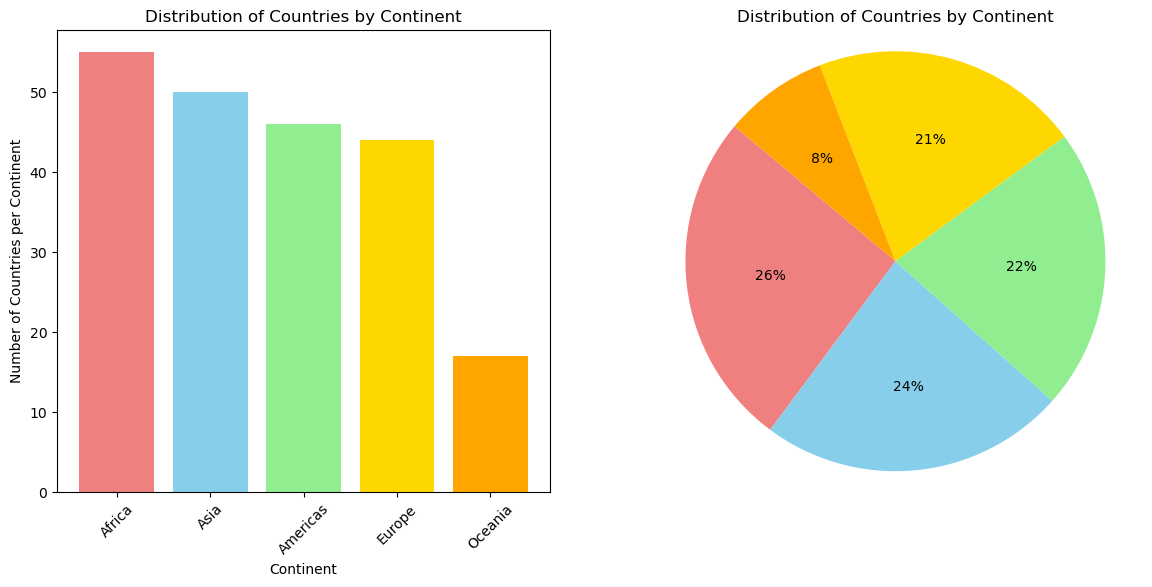

In [52]:
country_by_continent = df_final["Continent"].value_counts()

plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.bar(country_by_continent.index, country_by_continent.values, color = ["lightcoral", "skyblue", "lightgreen", "gold", "orange"])
plt.title("Distribution of Countries by Continent")
plt.xlabel("Continent")
plt.ylabel("Number of Countries per Continent")
plt.xticks(rotation = 45) 

plt.subplot(1, 2, 2)
plt.pie(country_by_continent, autopct = "%1.0f%%", startangle =140, colors = ["lightcoral", "skyblue", "lightgreen", "gold", "orange"])# autopct: adds percentages to the pie slices
plt.title("Distribution of Countries by Continent")
plt.axis("equal")  
# I have not included the labels in the pie chart since for indicating the countries I have used the same colors of the bar chart 

plt.show()


The second plots are two bar charts showing the three best and worst countries by GDP

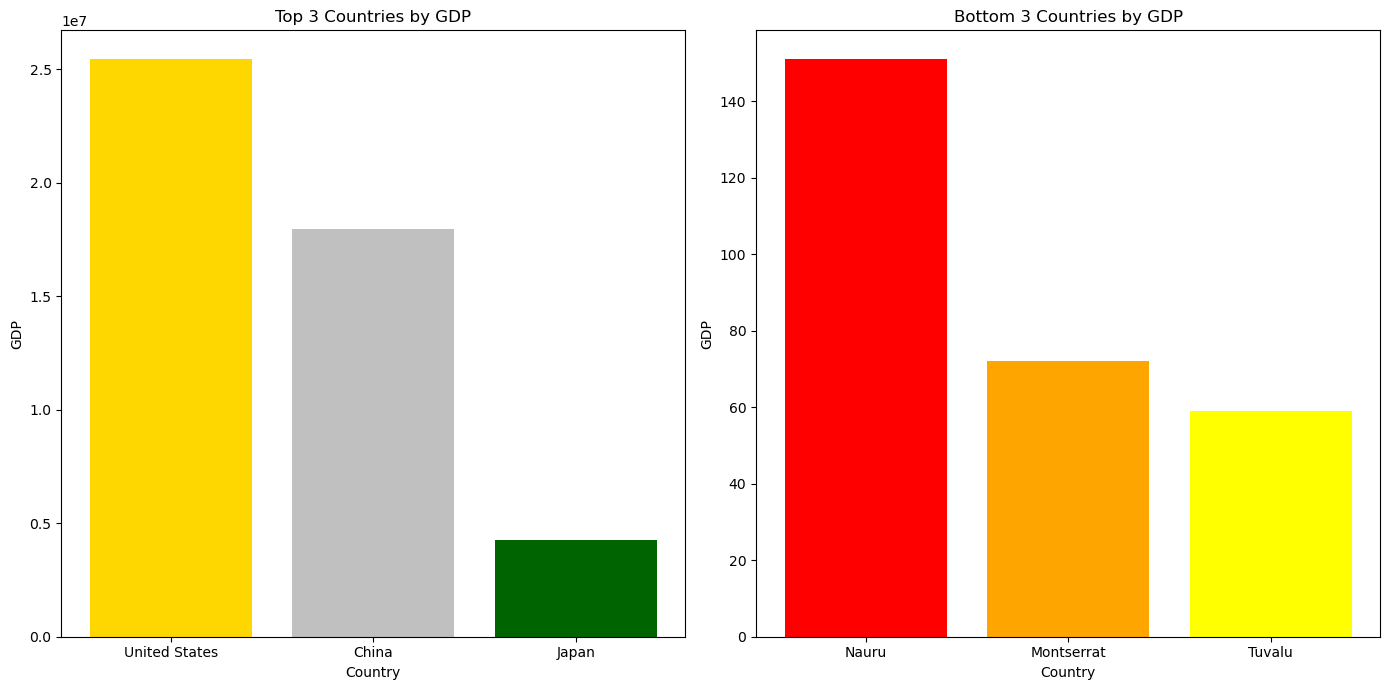

In [53]:
barchart_df = df_final.sort_values(by = "GDP", ascending = False)

top_3_countries = barchart_df.head(3)
bottom_3_countries = barchart_df.iloc[-3:]

fig, axes = plt.subplots(1, 2, figsize = (14, 7))

# Plotting the top 3 countries
axes[0].bar(top_3_countries["Country"], top_3_countries["GDP"], color = ["gold", "silver", "darkgreen"])
axes[0].set_title("Top 3 Countries by GDP")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("GDP")

# Plotting the bottom 3 countries
axes[1].bar(bottom_3_countries["Country"], bottom_3_countries["GDP"], color = ["red", "orange", "yellow"])
axes[1].set_title("Bottom 3 Countries by GDP")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("GDP")

# In order to have better spacing, I use the function tight_layout
plt.tight_layout()
plt.show()

I create a table showing in which continents the top three and bottom three countries are located

In [54]:
table = pd.concat([top_3_countries, bottom_3_countries])[["Country", "Continent"]]
print(table)

           Country Continent
1    United States  Americas
2            China      Asia
4            Japan      Asia
210          Nauru   Oceania
211     Montserrat  Americas
212         Tuvalu   Oceania


##### Research Question

In [55]:
GDP_continent_2022 = df_final.groupby("Continent")["GDP"].sum().reset_index()

# I rename the columns 
GDP_continent_2022.columns = ["Continent", "Total GDP 2022"]

# I order the continents from the one with the highest GDP to the lowest
GDP_continent_2022 = GDP_continent_2022.sort_values(by = "Total GDP 2022", ascending = False)
GDP_continent_2022.set_index("Continent", inplace = True)

print(GDP_continent_2022)

           Total GDP 2022
Continent                
Asia             37271920
Americas         33745645
Europe           23892272
Africa            2959984
Oceania           1998665


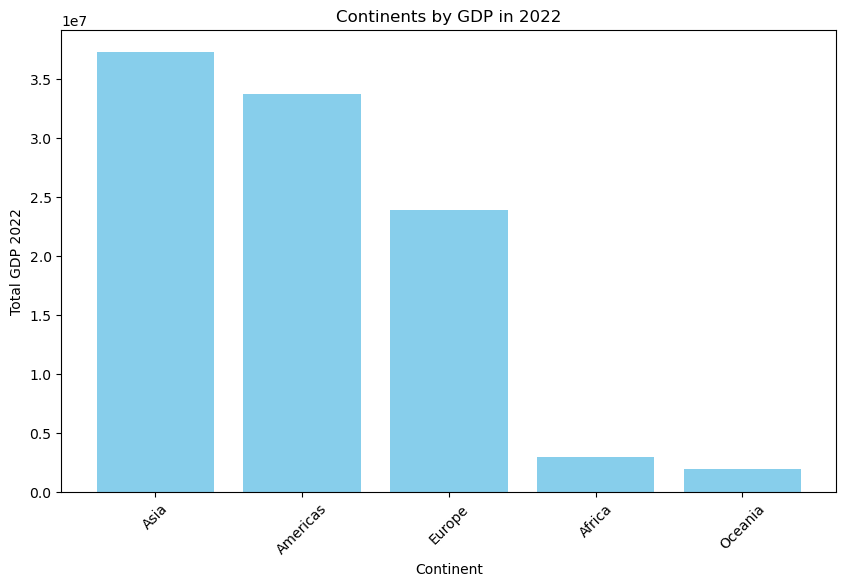

In [56]:
plt.figure(figsize = (10, 6))
plt.bar(GDP_continent_2022.index, GDP_continent_2022["Total GDP 2022"], color = "skyblue")

plt.xlabel("Continent")
plt.ylabel("Total GDP 2022")
plt.title("Continents by GDP in 2022")

plt.xticks(rotation = 45)
plt.show()

The analysis shows that Europe does not have the highest total GDP, since with a total amount of **23892272** (million US$) Europe is only the third continent after Asia and Americas.

I decided to create the same graph, but including only the three major continents in order to improve the visualization.

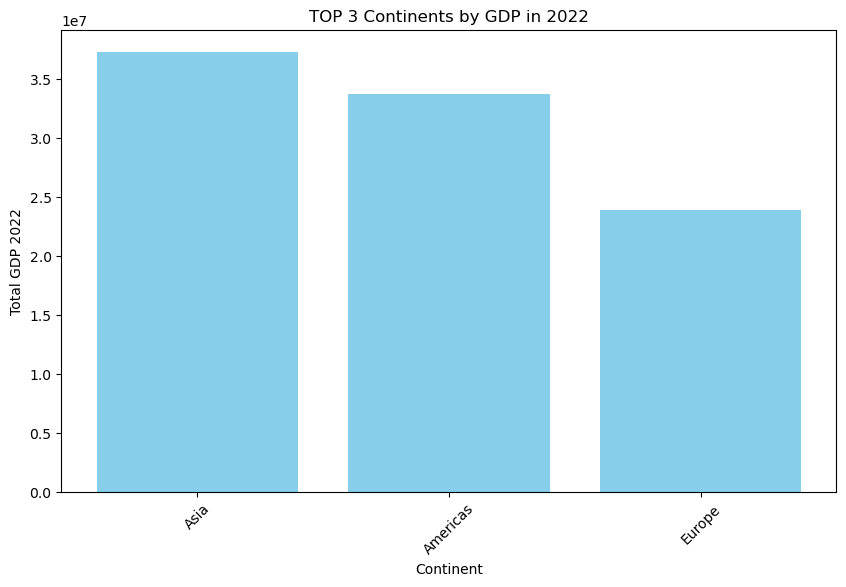

In [57]:
top_three_continents = GDP_continent_2022.head(3)

plt.figure(figsize = (10, 6))
plt.bar(top_three_continents.index, top_three_continents["Total GDP 2022"], color = "skyblue")

plt.xlabel("Continent")
plt.ylabel("Total GDP 2022")
plt.title("TOP 3 Continents by GDP in 2022")

plt.xticks(rotation = 45)
plt.show()

##### More in depth analysis

I decided to perform an additional analysis. 
The response to the research question is based on data from 2022, does it change if we look at the forecast for 2024? I will try to answer to this question:
- **Has Europe the highest GDP?** (looking at year **2024**, data are forecasts from **IMF**)

In [58]:
table = tables[2] 

In [59]:
countries = []
gdp_values = []
continents = []

rows = table.find_all("tr")
for row in rows:
    cells = row.find_all("td")
    if len(cells) > 1:
        
        country = cells[0].text.strip()
        gdp = cells[2].text.strip()
        gdp_value = generate_number(gdp)
        continent = cells[1].text.strip()
        
        if gdp_value != None: # if gdp is missing, skip the row
            
            countries.append(country)
            gdp_values.append(gdp_value)
            continents.append(continent)
            
df_2024 = pd.DataFrame({
    "Country": countries,
    "GDP" : gdp_values,
    "Continent" : continents
})
print(df_2024)

              Country        GDP Continent
0               World  109529216         —
1       United States   28781083  Americas
2               China   18532633      Asia
3             Germany    4591100    Europe
4               Japan    4110452      Asia
..                ...        ...       ...
190          Kiribati        311   Oceania
191             Palau        308   Oceania
192  Marshall Islands        305   Oceania
193             Nauru        161   Oceania
194            Tuvalu         66   Oceania

[195 rows x 3 columns]


In [60]:
df_final_2024 = df_2024.iloc[1:]
print(df_final_2024)

              Country       GDP Continent
1       United States  28781083  Americas
2               China  18532633      Asia
3             Germany   4591100    Europe
4               Japan   4110452      Asia
5               India   3937011      Asia
..                ...       ...       ...
190          Kiribati       311   Oceania
191             Palau       308   Oceania
192  Marshall Islands       305   Oceania
193             Nauru       161   Oceania
194            Tuvalu        66   Oceania

[194 rows x 3 columns]


In [61]:
GDP_continent_2024 = df_final_2024.groupby("Continent")["GDP"].sum().reset_index()

GDP_continent_2024.columns = ["Continent", "Total GDP 2024"]

GDP_continent_2024 = GDP_continent_2024.sort_values(by = "Total GDP 2024", ascending = False)
GDP_continent_2024.set_index("Continent", inplace = True)

print(GDP_continent_2024)

           Total GDP 2024
Continent                
Asia             39997291
Americas         38145714
Europe           26448117
Africa            2817335
Oceania           2091726


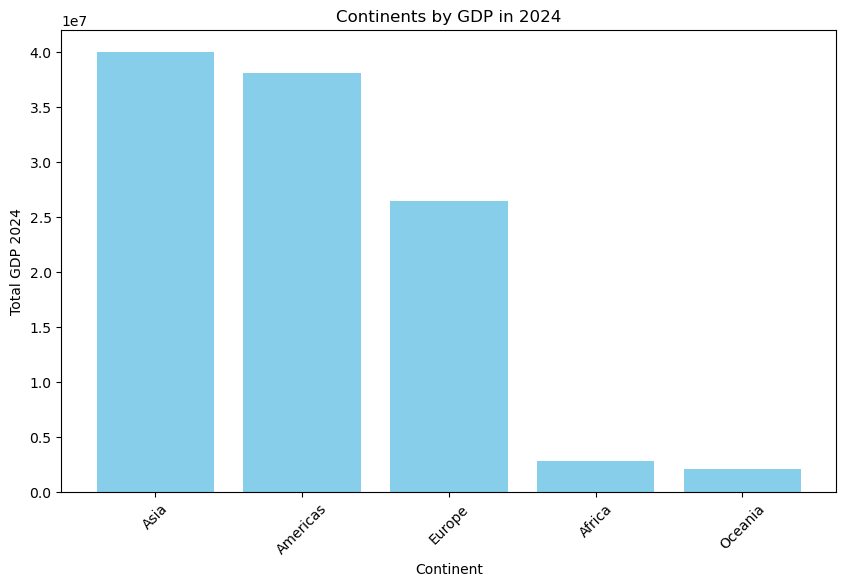

In [62]:
plt.figure(figsize = (10, 6))
plt.bar(GDP_continent_2024.index, GDP_continent_2024["Total GDP 2024"], color = "skyblue")

plt.xlabel("Continent")
plt.ylabel("Total GDP 2024")
plt.title("Continents by GDP in 2024")

plt.xticks(rotation = 45)
plt.show()

Europe is still the third continent regarding the GDP level (**26448117** million US$). Asia is the continent with the highest GDP, however the difference between Asia and Americas has reduced.

In [63]:
GDP_continent = GDP_continent_2022.reset_index().merge(GDP_continent_2024, on = "Continent", how = "left")
print(GDP_continent)

  Continent  Total GDP 2022  Total GDP 2024
0      Asia        37271920        39997291
1  Americas        33745645        38145714
2    Europe        23892272        26448117
3    Africa         2959984         2817335
4   Oceania         1998665         2091726
